In [147]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:130px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<font size = "5" color = 'red' > ch11 데이터프레임과 시리즈(pandas) </font>
- pip install pandas / conda install pandas (프롬프트)

# 1절 판다스 패키지
- 데이터 분석을 위해 반드시 알아야 할 패키지. 넘파이numpy 기반으로 다른 많은 라이브러리와 잘 통합되도록 설계
- 1차원 구조를 갖는 시리즈, 2차원 구조를 갖는 데이터프레임(excel의 스프레드시트)을 제공
- 판다스 장점 : 파일io, 부분 데이터 추출, 크기 변경, 데이터 분할, 병합, 정렬, 결측치 처리, 피벗과 언피벗(와이드포멧과 롱포멧) 등에 용이
- [Pandas API reference](https://pandas.pydata.org/docs/reference/index.html)
- [Pandas docs](https://pandas.pydata.org/docs/index.html)

In [2]:
import pandas as pd
pd.__version__

'1.5.3'

In [ ]:
data = pd.read_csv('data/ch09_member4.csv', skiprows=[6])
display(data)
display(type(data))

In [ ]:
data = pd.read_csv('data/ch09_member1.csv', 
                  names = ['name','age','email','address']) # header = None => 헤더가 없는 데이터프레임 생성
display(data)
display(type(data))

In [ ]:
# 최초 상위 2줄
data.head(2)

In [ ]:
data = pd.read_json('data/ch09_member.json') # 기본 인코딩 값 utf-8
data

In [ ]:
iris = pd.read_hdf('data/ch09_iris.hdf5', key = 'iris')
iris.head() # 상위 5개 추출

# 2절 ★ 데이터프레임 만들기
## 2.1 딕셔너리를 이용해서 데이터프레임 만들기

In [ ]:
d = {'kor' : [100, 90], 'math' : [95, 99]} # 딕셔너리를 데이터프레임으로
df = pd.DataFrame(d)
df

In [ ]:
df.to_dict() # 데이터프레임을 딕셔너리로 변환

In [ ]:
df.to_numpy()

In [ ]:
# 딕셔너리 리스트를 데이터 프레임으로
d = [{'kor' : 100, 'math' : 95},{'kor' : 90, 'math' : 99}] # 딕셔너리 리스트 : 웹크롤링 등의 경우 자주 활용
pd.DataFrame(d)

In [ ]:
kor = [100,90] ; math = [95,99]
pd.DataFrame(zip(kor,math), columns = ['kor', 'math'])

In [ ]:
df.info() # ★

In [ ]:
d = [{'kor' : 100, 'math' : 100}, {'kor' : 90, 'math' : 91}, {'kor' : 93, 'eng': 100}]
df = pd.DataFrame(d)
df

In [ ]:
df.info() # 결측치는 실수형(float64), 정수형 변환이 불가 => 결측치 대체 후 정수형 변환

In [ ]:
d = [{'kor' : 100, 'math' : 100}, {'kor' : 90, 'math' : 91}, {'kor' : 93, 'eng': 100}]
df = pd.DataFrame(d)
df

## 2.2 리스트를 이용해서 데이터프레임 만들기

In [ ]:
title = ['책1','책2','책3']
price = [15000,18000,10000]
df = pd.DataFrame(data={'title':title, 'price':price})
df

In [ ]:
import numpy as np
np.c_[title, price]
df = pd.DataFrame(np.c_[title, price], columns=['title','price'])
df

In [ ]:
df = pd.DataFrame(np.c_[title,price], columns=['title','price'])
df

In [ ]:
l = [['책1',15000],['책2',18000],['책3',10000],]
l
pd.DataFrame(l, columns=['title','price'])

## 2.3 pd.read_csv

In [ ]:
df = pd.read_csv(r'C:\ai_x\download\sharedata\상가정보_20250331\소상공인시장진흥공단_상가(상권)정보_세종_202503.csv',
                 # encoding='utf-8',
                 # sep=',',
                low_memory = False, # 데이터용량이 클 경우만 기입,
                nrows = 30, # 처음 30행만
                )
df.shape
df.head(1)

In [ ]:
# 판다스 디스플레이 옵션 : 
pd.options.display.max_columns = 39 # 기본값 20 => 39열까지 display 가능
pd.options.display.max_rows # 기본값 60 => 설정값에 따라 display 기능 설정 가능
display(df.head(1))

In [ ]:
display(df.head(1).T)

In [ ]:
df = pd.read_csv('data/ch11_membersep.csv', sep = '|')
df

In [ ]:
# (1) csv파일 불러오기(기본값)
# encoding = utf-8, sep = ',', csv파일의 첫번째 줄을 header로 인식, #이 있는 줄도 데이터로 인식
member = pd.read_csv('data/ch11_member.csv')
member.info()

In [ ]:
# type형 변환 Age열 : int64 => int16
member['Age'] = member['Age'].astype(np.int16) # 'int' = > int32, 'float' => float64
member.info()

In [ ]:
# 형 변환 : Birth열 object => datetime64[ns]
# member['Birth']
member['Birth_as'] = member['Birth'].astype('datetime64[ns]')
member.info()

In [ ]:
member['Birth_to'] = pd.to_datetime(member['Birth']) # astype()함수보다 안전한 형변환
member.info()

In [ ]:
# (2) 특정 행 제외하고 csv파일 읽기
member = pd.read_csv('data/ch11_membercp949.csv',encoding='cp949',
                    skiprows=[],
                    comment = '#') # 1번째 6번째 행은 제외하고 읽어오기 (헤더 = 인덱스 0번쨰)
member

In [ ]:
# (3) 주석(#) 제외,datetime형 필드 지정하여 csv 읽기
member = pd.read_csv('data/ch11_membertab.csv',
                     sep = '\t',
                     comment='#',
                    parse_dates=['Birth']) # ['Birth']를 가능하다면 datetime64[ns]형(type)으로 인식해라
member.info()

In [ ]:
# (4) sep ='|', 상위 5행만 읽어오기
member = pd.read_csv('data/ch11_membersep.csv', sep='|',nrows=5, ) # nrows = n : 상위 n개를 가져와라
member

## 2.4 패키지에서 가져오기(iris 데이터)
- sklearn, statsmodel, seaborn

### iris 가져오기 방법 1 : sklearn (머신러닝 패키지) ★ 
- 컬럼 체크
- 독립변수, 종속변수의 데이터 형태를 조정
- 데이터프레임화

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets 
# sklearn : 머신러닝을 위한 함수(전처리함수, 머신러닝, 성능평가를 위한 함수, 학습데이터셋)

In [ ]:
iris = datasets.load_iris()
iris.keys()

In [ ]:
print(iris.DESCR) # iris데이터 셋에 대한 설명

In [ ]:
iris.data # 독립변수
iris['data'][:3]

In [ ]:
# 데이터프레임에서 열이름
iris['feature_names']
columns = [i[:-5].replace(' ','_') for i in iris['feature_names']] + ['species']

In [ ]:
columns

In [ ]:
iris.keys()

In [ ]:
iris.target # 머신러닝 시 종속변수

In [ ]:
iris.target_names

In [ ]:
species = iris.target_names[iris.target] # numpy 배열인덱싱

In [ ]:
# 컬럼은 이미 완성되었으니 사용할 데이터를 합쳐서 완성시키기
# 독립변수
data = iris.data
# 종속변수
target = iris.target_names[iris.target]
data.shape, target.shape # 독립변수와 종속변수의 차원
final_data = np.c_[data,target]
iris_df = pd.DataFrame(final_data,columns=columns)
iris_df

### iris 가져오기 방법 2 : statsmodels (R 데이터) => 인터넷에 연결되야 활용 가능

In [ ]:
# R언어에 있는 유명한 데이터셋을 가져오는 함수
from statsmodels.datasets import get_rdataset
iris_dataset = get_rdataset('iris', 
                            package = 'datasets', # R언어에서 가장 많은 데이터셋을 가지고 있는 패키지로, 미언급 시 기본 값
                            cache = True) # 한 번 다운로드한 데이터셋을 pc에 캐시메모리로 저장
iris_dataset

In [ ]:
iris = iris_dataset.data
iris.head(1)

In [ ]:
iris['Sepal.Length']
# iris.Sepal.Length R언어에서는 객체의 개념이 없어서 간혹 변수명들에 .을 사용하는데 이런 경우 이 방법으로 접근이 불가하다.
new_columns = [colname.replace('.','_').lower() for colname in iris.columns] # 새컬럼으로 뽑아주고
new_columns
iris.columns = new_columns # 새컬럼을 할당하면 ** 컬럼 생성과 동시에 할당해도 전혀 문제 없음
iris # 컬럼을 변경할 수 있다

In [ ]:
iris.info()

### iris 가져오기 방법 3 : seaborn (시각화 패키지)

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

In [ ]:
# 데이터프레임을 csv파일로 저장
iris.to_csv('data/ch11_iris_df.csv', 
            sep=',', # 기본값
            encoding = 'utf-8', # 기본값
           index=False # 인덱스 제외 파일 출력
           )

In [ ]:
load_iris = pd.read_csv('data/ch11_iris_df.csv')

In [ ]:
load_iris.head(1)

#### 압축해서 파일 출력하기

In [ ]:
# 데이터프레임을 압축파일로 출력 .zip .gz .bz2 **.gz가 압축률이 좋았음
load_iris.to_csv('data/ch11_iris_2.gz', 
                 encoding = 'cp949', # 설정은 해줬으나 열 때는 encoding 조건을 주지 않아도 작동 => 한글이 없으니까
                 compression = 'infer', # 압축파일임을 확인하고 맞으면 압축해서 저장하라
                 index = False
                )

In [ ]:
load_data = pd.read_csv('data/ch11_iris.zip', compression = 'infer')
load_data.head(1)
load_data2 = pd.read_csv('data/ch11_iris_2.gz', compression = 'infer')
load_data2

# 3절 이름(열, 행) 지정하기
## 3.1 열 이름 지정하기

In [ ]:
member = pd.read_csv('data/ch11_member.csv', comment ='#', parse_dates=['Birth'])
member, member.info()

In [ ]:
member.columns = ['이름', '나이', '메일','주소','생년월일'] # 개수를 반드시 맞춰주어야한다.
member

In [ ]:
# member.columns.name = '정보' # 컬럼의 이름
member.columns.name = None
member

## 3.2 행 이름 지정하기

In [ ]:
member.index

In [ ]:
member.index = [f'{i+1}번째' for i in range(5)]
member

In [ ]:
member.index = range(0,len(member))
member

In [ ]:
member.index = range(11,16)
member

In [ ]:
member.index = ['동','서','남','북','중']
member

In [ ]:
member.index.name = '방향'

In [ ]:
member

In [ ]:
member.index.name = None

In [ ]:
member

In [ ]:
print(member.index.name)

In [ ]:
member.loc['남', '이름'] # loc : 행'이름'과 열'이름'으로 데이터 부분 조회

In [ ]:
member.columns.name = '정보'
member.index.name = '방향'
member

In [ ]:
member.reset_index()

In [ ]:
# 특정 열을 인덱스로 세팅
member1 = member.set_index('이름')
member1.index.name

In [ ]:
member1.loc['홍길동']

In [ ]:
# member를 수정하려면 (1) 할당 (2) inplace 매개변수에 True (default : False)
member

In [ ]:
member.set_index('이름',inplace = True) # 이름 열을 index로

In [ ]:
member.reset_index(inplace = True) # index를 이름 열로 (index.name = 'index', 'level_0' 까지 가능)

In [ ]:
member

In [ ]:
# 시리즈(datetime64[ns]형 일때).dt : datetime열의 날짜 및 시간에 관련된 정보만 추출
member['생년월일'].dt.month

In [ ]:
member['생년월일'].dt.weekday # 0 월요일 1 화요일 ..... 5 토요일 6 일요일

## 3.3 레벨 이름 지정하기

In [ ]:
member

In [ ]:
member.columns = [['기본정보','기본정보','기본정보','추가정보','추가정보'],
                 ['이름', '나이', '메일', '주소','생년월일']]

In [ ]:
member # 속성 부여가 가능

In [ ]:
member.columns.names = ['대분류','소분류']

In [ ]:
member

In [ ]:
member['기본정보']

In [ ]:
member.index = [['좌우','좌우','상하','상하','상하'],
               ['동','서','남','북','중']]
member.index.names = [ '레벨1','레벨2']

In [ ]:
member

In [ ]:
member.loc[('좌우','동'),'기본정보'] # 튜플로 차원 접근이 가능하다

# 4절 부분 데이터 조회하기
- member['열 이름'] 특정열 => 여러줄 조회는 [ [열1, 열2...] ]
- member[조건]
- member.loc[행 이름, 열 이름:열이름] 슬라이싱 가능
- member.iloc[행 번호(인덱스), 열 번호(인덱스)]

## 4.1 열 조회하기


In [ ]:
member = pd.read_csv('data/ch11_member.csv', comment = '#', parse_dates=['Birth'])
member

In [ ]:
member['Name'], member.Name

In [ ]:
member[ ['Name', 'Age'] ] # [] 안에는 단일 열이름 혹인 [열이름 리스트], 조건만 사용가능

In [ ]:
# 행을 조회할 경우 loc, iloc을 이용한다.  member.loc[0]

## 4.2 loc을 이용한 이름으로 조회
- df.loc[행이름, 열이름] : 행 이름과 열 이름으로 조회
    * 행 이름과 열 이름 자리에 lise ex. ['Name', 'Email']
    * 행 이름과 열 이름 자리에 슬라이싱 ex [from:stop, from:stop] => stop 행 / 열을 포함한다.
    * [] 속의 ",열이름" 생략 시 모든 열을 출력
    
- 슬라이싱이 가능하며 loc방법은 열 이름을 따라 모두 조회(cf stop-1까지 X)

In [ ]:
member.index = ['동','서','남','북','중']
member

In [ ]:
# member의 동 행부터 남 행
member.loc['동':'남']

In [ ]:
# member의 동 행부터 남 행까지 "Name","Age","Email"
member.loc['동':'남',"Name" : "Email"]

In [ ]:
# member의 동 행과 남 행, "Name","Email","Address"
member.loc[['동','남'],["Name", "Email","Address"]]

In [ ]:
# loc을 이용한 특정 열 조회
member['Name']
member.loc[:,['Name',"Address"]] # member['Name',"Address"]

In [ ]:
member['Name'] # 특정 행이나 열만 access => 결과가 시리즈로 반환
type(member['Name'])

In [ ]:
member[["Name"]]

In [ ]:
member.loc['동'] # 시리즈 반환

In [ ]:
member.loc['동':'동'] # 시리즈 반환이 아니라 데이터프레임 반환이 필요하면 슬라이싱을 통해 얻을 수 있음

## 4.3 iloc을 이용한 이름으로 조회
- df.iloc[행번호, 열번호] : 행 번호와 열 번호로 조회
    * 행 번호와 열 번호 자리에 lise ex. [0, 2]
    * 행 번호와 열 번호 자리에 슬라이싱 ex [[1:2],[2,3]], [from:stop:step, from:stop:step] => stop-1 까지
    * [  ] 속의 ",열 번호" 생략 시 모든 열을 출력 cf) 행번호는 생략이 불가능
   

In [ ]:
member

In [ ]:
# member의 0번째 행부터 2번째 행 모든 열
member.iloc[0:3] # == member.loc['동':'남']

In [ ]:
# member의 0번째 행부터 2번째 행 짝수번째 열
member.iloc[0:3,0::2]

In [ ]:
member.iloc[1] # 시리즈. 데이터프레임으로 만드려면 (1) 슬라이싱 이용 (2) pd.DataFrame(시리즈)
member.iloc[1:2] # 데이터프레임

In [ ]:
# member의 짝수번째 행의 마지막 열 제외
member.iloc[::2,:-1]

In [ ]:
# 모든 행의 마지막 열만 "데이터 프레임"으로 추출
member.iloc[:,-1:].iloc[-1,-1]

In [ ]:
# 0번째, 3번째 행 // 0번째, 3번째, 4번째 열 => 리스트를 넣어도 가능하다.
member.iloc[[0,3],[0,3,4]]

## 4.4 조건으로 조회하기
- df[ 조건 ] : 조건에 맞는 행(모든 열)
- df.loc[ 조건, 열 ] 또는 df[ 조건 ][ 열이름 ] : 조건에 맞는 행의 특정 열
    - 조건이 str이면 Series.str.함수 를 사용할 수 있다.

In [ ]:
# Age가 22보다 큰 데이터 셋 _ loc 쓰는 방법 : 비추
member.loc[member.Age>22] 

In [ ]:
# Age가 22보다 큰 데이터 셋
member[member.Age > 22] 
# member[[False,True,False,False,True,]] # Boolian 인덱싱 => numpy와 동일

In [ ]:
# Age가 22보다 큰 데이터의 Name, Age
member[member.Age > 22][['Name','Age']] #1
member.loc[member.Age>22,'Name':'Age'] #2 or member.loc[member.Age>22,['Name','Age']]

In [ ]:
# 괄호가 많으면 가독성이 급격히 떨어지기 때문에 가능하면 괄호를 줄이는 방법으로 풀어나가기

※ 시리즈에 문자함수를 쓰기 위해 참조 https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [ ]:
address1 = '서울시 강동구'
address2 = '부산시 중구'
print(address1.startswith('서울시'))
print(address2.startswith('서울시'))
print(address1.find('강동구') != -1)
print(address2.count('강동구') > 0)

In [ ]:
# Address가 서울시로 시작하는 행들
member[member.Address.str.startswith('서울')]

In [ ]:
# Address에 강동구가 포함
member[member.Address.str.contains('강동구')]
member[member.Address.str.find('강동구')!=-1]
member[member.Address.str.count('강동구')>0]

In [ ]:
# Address에 강동구가 포함되고 'Name','Age'
member.loc[member.Address.str.contains('강동구'),'Name':'Age']
member[member.Address.str.contains('강동구')][['Name','Age']]

In [ ]:
# 1999년도 태어난 데이터
member[member.Birth.dt.month <= 6]

## 4.5 연습
import seaborn as sns
iris = sns.load_dataset('iris')
```
# 1. sepal_length 열만 출력

# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)

# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)

# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)

# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)

# 6. species가 versicolor인 데이터의 모든 열

# 7. species가 setosa인 데이터 최초 5개 행만 출력

# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력

# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'

# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열
```

In [ ]:
# 1. sepal_length 열만 출력
pd.DataFrame(iris['sepal_length'])
iris.sepal_length

In [ ]:
# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)
display(iris.iloc[:11,:-1])
display(iris.loc[:10,'sepal_length' : 'petal_width'])

In [ ]:
# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)
display(iris.iloc[3:11,[0,2]])
display(iris.loc[3:10,['sepal_length','petal_length']])

In [ ]:
# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
display(iris.iloc[0::50])
display(iris.loc[0:100:50]) # 비추
display(iris.loc[[0,50,100]])

In [ ]:
# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)
display(iris.iloc[::25,iris.columns.get_loc('petal_length'):-1])
display(iris.iloc[::25,2:-1])
display(iris.loc[::25,['petal_length','petal_width']]) # loc에서 인덱스 처럼 슬라이싱 하는 건 비추

In [ ]:
# 6. species가 versicolor인 데이터의 모든 열
iris.loc[iris.species == 'versicolor']

In [ ]:
# 7. species가 setosa인 데이터 최초 5개 행만 출력
iris.loc[iris.species == 'setosa'].head()

In [ ]:
# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력
iris.loc[iris.sepal_length >= 6.5].head()

In [ ]:
# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'
iris.loc[iris.sepal_length >= 7.2,['sepal_length','sepal_width','petal_length']].head()
iris.loc[iris.sepal_length >= 7.2,'sepal_length':'petal_length'].head()

In [ ]:
# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열
iris[(iris.species=='versicolor') & (iris.sepal_length > 6.5)] # and 연산 불가하나 & 연산이 가능하다. 비트연산하지 않기 위해 괄호습관
# iris[np.logical_and((iris.species=='versicolor'),(iris.sepal_length > 6.5))]

In [ ]:
import numpy as np
np.logical_and(True,True)

## 4.6 정리
- 데이터 프레임의 부분 데이터 조회 방법
- df[열이름] - 특정 열 모든 행 조회
- df[조건] - whrjsdp akwsms dlfma god whghl
- df.loc[행이름, 열이름] : 이름조회, 조건(행이름 자리)으로 조회 가능
    * 열이름을 생략하면 모든 열
    * 행이름, 열이름 자리에 list, 슬라이싱
- df.iloc[행번호, 열번호] : 번호 조회
    * 열번호를 생략하면 모든 열
    * 행번호, 열번호 자리에 list, 슬라이싱

# 5절 데이터 추가 및 삭제
## 5.1 DataFrame  요소 삭제
- df.drop(label(행 혹은 열 이름), axis) : axis = 0 행 삭제 / axis = 1 열 삭제

In [ ]:
member = pd.read_csv('data/ch11_member.csv', comment='#', parse_dates=['Birth'])
member.index = ['동','서','남','북','중']
member

In [ ]:
# (1) 단일 행 삭제
member.drop('중', inplace = True) # axis 기본 값 : 0
member

In [ ]:
# (2) 복수 행 삭제
member.drop(['동','서'],
            #inplace = True
           )

In [ ]:
# (3) 열 삭제
display(member.drop(labels = 'Email', axis = 1), member.drop(labels = ['Email','Address'], axis = 1))

## 5.2 DataFrame 요소 추가

In [ ]:
# 데이터프레임 열 추가 1 : 공통된 값으로 추가
member['favorite_no'] = 7 # 기본 dtype = int64
member

In [ ]:
# 데이터프레임 열 추가 2 : 행 개수와 동일한 크기의 리스트를 추가
member['fn'] = [7,7,7,None] # 결측치 None, np.nan

In [ ]:
member

In [ ]:
import math
np.nan, None, math.nan # 결측치 3형제

In [ ]:
# 결측치는 정수형 변환이 불가(결측치 대체 후 형변환) : fillna 활용 등

In [ ]:
# 데이터프레임 열 추가 3 : 시리즈 추가
member['fn2'] = pd.Series([180,175,160], index=['동','서','북']) # index = [인덱스 이름이 들어가야함]

In [ ]:
member

In [ ]:
member = pd.read_csv('data/ch11_member.csv', comment = '#')
member
member['fn2'] = pd.Series([180,175,160])

In [ ]:
member

In [ ]:
# 데이터프레임 열 추가 3-2 : 시리즈 추가 + index = [인덱스(이름) 리스트]활용
member['fn2'] = pd.Series([180,175,160], index=[0,3,4])
member

In [ ]:
# 데이터프레임 행 추가 1
# 행은 추가할 때 데이터를 데이터프레임 형태로 바꾼 후 기존 데이터프레임, 추가할 데이터프레임 두 데이터 프레임을 연결하는 방식 concat

In [ ]:
member = pd.read_csv('data/ch11_member.csv', comment = '#')
member
newmember = pd.DataFrame([{'Name' : '김길동', 'Age':35,'Email' : 'wow@gong.com','Address':'서울시 성동구','Birth':'2005-05-05'}])

In [ ]:
newmember, newmember.index

In [ ]:
# 행 추가 시 member와 newmember 연결
member = pd.concat([member,newmember]) # axis : default = 0, 행연결 if) axis = 1 열 연결

In [ ]:
member

In [ ]:
# 열방향으로 붙이는 경우
a = pd.DataFrame({'kor':[10,20,30],
                  'mat':[40,50,50]})
b = pd.DataFrame({'eng':[10,20,30],
                 'sci' : [44,50,60]})
a,b
pd.concat((a,b), axis=1)

In [ ]:
# 인덱스 재조정
member.index = range(len(member)) # 비추
member

In [ ]:
member.reset_index(drop = True, inplace=True) # 기존의 index를 drop하고 새로운 연속된 index로 재조정
# member.reset_index() : 기존의 index를 column에 편입시키고 새로운 연속된 index를 생성

In [ ]:
member

# 6절 병합과 연결
## 6.1 merge()를 이용한 병합

In [ ]:
df1 = pd.DataFrame({'key' : ['a','b','c','d'], 'c1' : [1,2,3,4] })
df2 = pd.DataFrame({'key' : ['a','b','c','e'], 'c2' : [5,6,7,8] })
display(df1, df2)

In [ ]:
df1.merge(df2) # default how = ' inner' : 양쪽 다 일치하는 데이터만 남김

In [ ]:
df1.merge(df2, how = 'outer') # how = 'outer' : 양쪽 데이터를 모두 남김

In [ ]:
df1.merge(df2, how = 'right') # how = 'right' : 오른쪽(df2)를 기준으로 데이터를 남김

In [ ]:
df1.merge(df2, how = 'left') # how = 'left' : 왼쪽(df1)를 기준으로 데이터를 남김

In [2]:
import pandas as pd
df3 = pd.DataFrame({'key3' : ['a','b','c','f'], 'c1' : [1,2,3,5] })
df4 = pd.DataFrame({'key4' : ['a','b','d','f'], 'c2' : [5,6,7,8] })
display(df3, df4)

,key3,c1
0,a,1
1,b,2
2,c,3
3,f,5


,key4,c2
0,a,5
1,b,6
2,d,7
3,f,8


In [3]:
# df3.merge(df4) # 공통된 속성이 없어서 작동하지 않음
df3.merge(df4, left_on='key3',right_on='key4') # key3 과 key4에 따라 병합을 해라

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,f,5,f,8


In [536]:
# df3.merge(df4) # 공통된 속성이 없어서 작동하지 않음
df3.merge(df4, left_on='key3',right_on='key4', how = 'outer') # key3 과 key4에 따라 병합을 해라

,key3,c1,key4,c2
0,a,1.0,a,5.0
1,b,2.0,b,6.0
2,c,3.0,NaN,NaN
3,f,5.0,f,8.0
4,NaN,NaN,d,7.0


In [539]:
df3.merge(df4, left_index= True, right_index= True) # 인덱스를 기준으로 합쳐짐 == pd.concat([df3, df4], axis=1)

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,c,3,d,7
3,f,5,f,8


## 6.2 concat()을 이용한 연결
- pd.concat( [df1, df2] ,axis)
    * axis = 0 : 기본값, 위아래로 연결
    * axis = 1 : 좌우로 연결
    * 행렬의 형태와 column의 이름에 따라 결측치가 발생

In [542]:
# 위아래 연결
df1 = pd.DataFrame({'key' : ['a','b','c','d'], 'c1' : [1,2,3,4] })
df2 = pd.DataFrame({'key' : ['a','b','c','e'], 'c1' : [5,6,7,8] })
pd.concat([df1,df2], axis = 0).reset_index(drop = True)

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4
4,a,5
5,b,6
6,c,7
7,e,8


In [545]:
# 좌우 연결
df3 = pd.DataFrame({'key3' : ['a','b','c','f'], 'c1' : [1,2,3,5] })
df4 = pd.DataFrame({'key4' : ['a','b','d','f'], 'c2' : [5,6,7,8] })
pd.concat([df3,df4], axis = 1)

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,c,3,d,7
3,f,5,f,8


- merge는 공통속성을 따지지만 concat은 공통 속성을 따지지 않음

# 7절 정렬
- 행/열이름 정렬 df.sort_index(axis) 행(axis=0) 또는 열(axis=1) 이름으로 정렬
- 값에 의한 정렬 df.sort_values(by=정렬기준이 될 열 이름, ascending = T/F, inplace = True)
    * 주의 : '100' < '9'

In [562]:
member = pd.read_csv('data/ch11_member.csv', comment = '#')
member.index = ['동','서','남','북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.1 행 이름으로 정렬

In [565]:
member.sort_index(axis = 0)
member.sort_index(axis = 'rows', inplace= True) # ascending : True(기본값), 오름차순

In [566]:
member

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.2 열 이름으로 정렬


In [568]:
member.sort_index(axis = 1)
member.sort_index(axis = 'columns', inplace = True) # ascending : True(기본값), 오름차순

In [569]:
member

,Address,Age,Birth,Email,Name
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중


## 7.3 값에 의한 정렬

In [584]:
member.sort_values('Age')
new_member = pd.DataFrame([{'Name' : '칼치기','Age' : 20, 'Birth' : '1999-01-02', 'Address' : '서울시 관악구', 'Email':'hong@naver.com'}])
new_member
member = pd.concat([member, new_member])
member

,Address,Age,Birth,Email,Name
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
0,서울시 관악구,20,1999-01-02,hong@naver.com,칼치기
0,서울시 관악구,20,1999-01-02,hong@naver.com,칼치기
0,서울시 관악구,20,1999-01-02,hong@naver.com,칼치기


In [585]:
member.index = ['동','서','남','북','중','중','중','중']

In [594]:
member.sort_values('Age', ascending=False, inplace=True) # 'Age'열 값을 기준으로 오름차순 정렬

In [598]:
# 기준이 2개(이상)일 경우 : 'Address' 기준 오름차순 정렬, 'Address' 가 같으면 'Age' : 특별한 지정 없으면 오름차순
member.sort_values(by = ['Address','Age'])

,Address,Age,Birth,Email,Name
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
서,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
동,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
중,서울시 관악구,20,1999-01-02,hong@naver.com,칼치기
중,서울시 관악구,20,1999-01-02,hong@naver.com,칼치기
중,서울시 관악구,20,1999-01-02,hong@naver.com,칼치기
남,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
북,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


In [603]:
# 기준이 2개(이상)일 경우 : 'Age' 기준 오름차순 정렬, 'Age' 가 같으면 'Name' 내림차순
member.sort_values(by = ['Age','Name'], ascending=[True,False], inplace=True)

In [604]:
member

,Address,Age,Birth,Email,Name
서,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
중,서울시 관악구,20,1999-01-02,hong@naver.com,칼치기
중,서울시 관악구,20,1999-01-02,hong@naver.com,칼치기
중,서울시 관악구,20,1999-01-02,hong@naver.com,칼치기
동,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
남,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
북,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


#### 연습

In [606]:
# iris 데이터셋
# (1) sepal_length 값 기준(sepal_length가 같으면 sepal_width 기준) 내림차순 정렬 => iris 데이터셋 내용이 바뀌어있어야한다.
# (2) 행이름(index) 기준으로 정렬(원상복구)
# (3) 열 이름(column) 기준으로 정렬한 내용을 출력
iris_ =iris.copy()

In [610]:
#1.
iris.sort_values(by = ['sepal_length','sepal_width'], ascending=False, inplace = True)
iris 

,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,virginica
117,7.7,3.8,6.7,2.2,virginica
135,7.7,3.0,6.1,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
118,7.7,2.6,6.9,2.3,virginica
...,...,...,...,...,...
41,4.5,2.3,1.3,0.3,setosa
42,4.4,3.2,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa


In [613]:
#2.
iris.sort_index(inplace = True)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [614]:
#3.
iris.sort_index(axis=1)

,petal_length,petal_width,sepal_length,sepal_width,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa
...,...,...,...,...,...
145,5.2,2.3,6.7,3.0,virginica
146,5.0,1.9,6.3,2.5,virginica
147,5.2,2.0,6.5,3.0,virginica
148,5.4,2.3,6.2,3.4,virginica


# 8절 기초 통계 분석
    * 판다스 : 기초 통계 / statsmodels : 난이도 있는 통계 => 많은 독립변수 중 상관 관계 분석, 
    * 통계 : 표본으로 모집단 내용 확인
    * 빅데이터와 머신러닝은 표본이 아니라 모집단으로 전체를 보고 향후 방향성을 체크하는 것
- count : 결측치Nan를 제외한 갯수
- max
- sum
- cumsum : 누적합 => 독립변수의 상징성 체크 시 주로 사용
- cumprod : 누적곱
- rolling(n).mean : 데이터 변동(노이즈)가 다소 있을 때, 추세(패턴)을 부드럽게 보고 싶을 때 사용(n개 표본의 평균 반환)
- mean ★
- var : 분산 ( (평균-값)^2/개수 ) ★
- std : 표준편차 ( (분산)^0.5 ) ★
- median : 중위수(평균은 합/개수, 중위수는 상위50%에 해당) ★ => 이상치 유무 체크에 효과적
- qunantile : 분위수( 0사분위수(0%), 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 4사분위수(100%) ) => 이상치 체크에 효과적
```
     IQR = Q3-Q1
     [Q1 - 1.5*IQR ~ Q3+1.5*IQR] 이외의 값은 이상치
     Q4(max)
     Q3
     Q2
     Q1
     Q0(min)
```
- 최소 하한치 Q1 - 1.5*(Q3-Q1) / 최대 상한치 Q + 1.5*(Q3-Q1)
- describe : 요약 통계량
- corr : 상관관계(계수)

In [5]:
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
iris.columns = [col.lower().replace('.','_') for col in iris.columns]
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 8.1 min, max, mean, std...

In [13]:
iris.min(axis=0) # 열별 최솟값(문자필드는 아스키코드값이 작은 순으로 배열)

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [14]:
iris.mean()  # 글짜와 날짜는 평균값을 구할 수 없으니 주의 => 필요시 numeric_only = True 활용

C:\Users\Admin\AppData\Local\Temp\ipykernel_7928\935066809.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.mean()


sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [20]:
iris.median(axis=0, numeric_only = True) # 행들의 중위수(열별 중위수)
# 평균, 중위수, 표준편차, 분산.... 숫자필드

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [52]:
X = iris.iloc[:,:-1]
X.sample() # 랜덤으로 1개 행을 반환

,sepal_length,sepal_width,petal_length,petal_width
88,5.6,3.0,4.1,1.3


In [59]:
X.std(axis=0)
X.std(axis='index')

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [60]:
X.std(axis = 'columns')
X.mean(axis=1)

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

In [83]:
# quantile : 데이터프레임이나 시리즈에서 사분위수
# interpolation='nearest' 정확한 구간의 값이 없을 경우 가까운 데이터를 출력
df = pd.DataFrame(data=[1,2,3,4,7,10]) ; df.columns = ['Value']
df['Value'].quantile(q=[0,0.25,0.5,0.75,1.],interpolation='nearest')

0.00     1
0.25     2
0.50     3
0.75     7
1.00    10
Name: Value, dtype: int64

In [85]:
# interpolation='midpoint' 정확한 구간을 출력
df['Value'].quantile(q=[0,0.25,0.5,0.75,1.],interpolation='midpoint')

0.00     1.0
0.25     2.5
0.50     3.5
0.75     5.5
1.00    10.0
Name: Value, dtype: float64

In [88]:
iris.quantile(0.5, numeric_only=True), X.quantile(0.5)

(sepal_length    5.80
 sepal_width     3.00
 petal_length    4.35
 petal_width     1.30
 Name: 0.5, dtype: float64,
 sepal_length    5.80
 sepal_width     3.00
 petal_length    4.35
 petal_width     1.30
 Name: 0.5, dtype: float64)

In [90]:
quant = X.quantile(q=[0,0.25,0.5,0.75,1])
quant

,sepal_length,sepal_width,petal_length,petal_width
0.00,4.3,2.0,1.00,0.1
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8
1.00,7.9,4.4,6.90,2.5


In [95]:
# sepal_length의 이상치 점검 방법
min_ = quant.iloc[0,0]
max_ = quant.iloc[4,0]
q1 = quant.iloc[1,0]
q3 = quant.iloc[3,0]
min_ < q1 - 1.5*(q3-q1) # 하한치 보다 모든 값이 크다, 하한이상치가 없다
max_ > q3 + 1.5*(q3-q1) # 상한치 보다 모든 값이 작다, 상한이상치가 없다

False

In [97]:
X.shape, X.count(axis = 0) # 결측치를 제외한 데이터 개수 : 행의 수와 카운트 된 수의 확인을 통해 체크 가능

((150, 4),
 sepal_length    150
 sepal_width     150
 petal_length    150
 petal_width     150
 dtype: int64)

In [99]:
X.rolling(5).sum().iloc[4:] # 0 ~ 3번 인덱스는 자신보다 작은 인덱스의 개수가 5개가 될 수 없어서 Nan 발생해 4번 인덱스 부터 체크

,sepal_length,sepal_width,petal_length,petal_width
4,24.3,16.4,7.0,1.0
5,24.6,16.8,7.3,1.2
6,24.3,17.2,7.3,1.3
7,24.6,17.4,7.5,1.3
8,24.4,17.2,7.4,1.3
...,...,...,...,...
145,32.9,15.3,27.0,11.3
146,32.3,14.7,26.9,10.9
147,33.0,15.0,27.0,11.0
148,32.4,15.2,26.5,11.0


## 8.2 요약통계량 describe

In [104]:
# 1) 기본 요약 통계량
iris.describe() # 숫자열과 문자열이 같이 있을 경우 숫자열만 요약 통계

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [106]:
# 문자열 요약통계량 : 데이터 개수, 데이터 종류(unique), 최빈데이터(top), 최빈데이터개수(freq)
iris.species.describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [110]:
# 2) describe()의 매개변수 include, exclude
df =pd.DataFrame(data={'a' : [1, 2, 3,]*2, 
                       'b' : [2., 1]*3,
                       'c' : ['aaa']*5+['bbb'],
                      'd' : [True, False]*3})
display(df)
df.info()

,a,b,c,d
0,1,2.0,aaa,True
1,2,1.0,aaa,False
2,3,2.0,aaa,True
3,1,1.0,aaa,False
4,2,2.0,aaa,True
5,3,1.0,bbb,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      int64  
 1   b       6 non-null      float64
 2   c       6 non-null      object 
 3   d       6 non-null      bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 278.0+ bytes


In [111]:
df.describe() # 숫자열만 기본 요약 통계량 반환

,a,b
count,6.000000,6.000000
mean,2.000000,1.500000
std,0.894427,0.547723
min,1.000000,1.000000
25%,1.250000,1.000000
50%,2.000000,1.500000
75%,2.750000,2.000000
max,3.000000,2.000000


In [112]:
df.describe(include=['float64','bool']) # 전체 중 include = 반환할 데이터타입

,b,d
count,6.000000,6
unique,NaN,2
top,NaN,True
freq,NaN,3
mean,1.500000,NaN
std,0.547723,NaN
min,1.000000,NaN
25%,1.000000,NaN
50%,1.500000,NaN
75%,2.000000,NaN


In [115]:
df.describe(include='all')

,a,b,c,d
count,6.000000,6.000000,6,6
unique,NaN,NaN,2,2
top,NaN,NaN,aaa,True
freq,NaN,NaN,5,3
mean,2.000000,1.500000,NaN,NaN
std,0.894427,0.547723,NaN,NaN
min,1.000000,1.000000,NaN,NaN
25%,1.250000,1.000000,NaN,NaN
50%,2.000000,1.500000,NaN,NaN
75%,2.750000,2.000000,NaN,NaN


In [117]:
df.describe(exclude='bool') # 전체에서 exclude = 제외할 타입

,a,b,c
count,6.000000,6.000000,6
unique,NaN,NaN,2
top,NaN,NaN,aaa
freq,NaN,NaN,5
mean,2.000000,1.500000,NaN
std,0.894427,0.547723,NaN
min,1.000000,1.000000,NaN
25%,1.250000,1.000000,NaN
50%,2.000000,1.500000,NaN
75%,2.750000,2.000000,NaN


In [122]:
df['c'].unique() # 특정 컬럼의 고유 값들의 종류(도메인)

array(['aaa', 'bbb'], dtype=object)

In [123]:
df['c'].value_counts() # 특정 컬럼의 고유 값들의 개수

aaa    5
bbb    1
Name: c, dtype: int64

In [125]:
df.var(numeric_only=True)

a    0.8
b    0.3
d    0.3
dtype: float64

In [126]:
df.select_dtypes(include='object') # object형 컬럼만 추출

,c
0,aaa
1,aaa
2,aaa
3,aaa
4,aaa
5,bbb


In [127]:
df.select_dtypes(exclude='object')# object형 컬럼만 제외하고 추출

,a,b,d
0,1,2.0,True
1,2,1.0,False
2,3,2.0,True
3,1,1.0,False
4,2,2.0,True
5,3,1.0,False


## 8.3 공분산, 상관계수

In [131]:
X
X.cov() # 공분산

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [134]:
# -1(반비례) <= 상관계수 <= 1(비례)
X.corr() # 상관계수
# 상관계수의 절대값이 0에 가까울 수록 무관한, 중요한 데이터
# 상관계수의 절대값이 1에 가까울 수록 유관한, 비교적 덜 중요한 데이터
# 상관계수가 0.7보다 크면 의미가 있다.... 상관이 있다.... => 회귀분석을 통해 이 관계가 어떤 영향을 끼치나 확인해야한다.

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


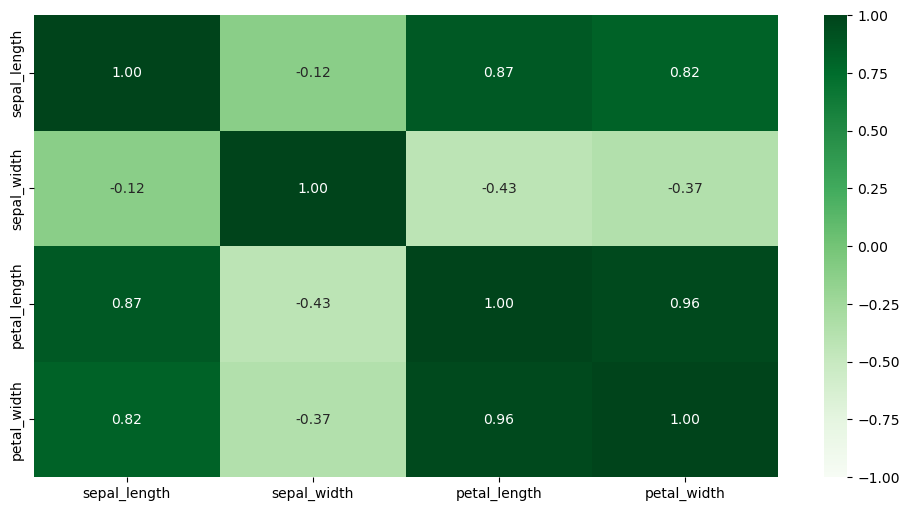

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(X.corr(), vmin = -1, vmax=1,annot = True,fmt = '.2f', cmap='Greens')
plt.show()